# code + constants

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# enviroment size
# in this case, 10x10 grid
GRID_SIZE = (10, 10)
NUM_PARTICLES = 100

randomized particle initilization

In [2]:
def initialize_particles():
    return [(random.randint(0, GRID_SIZE[0] - 1), 
             random.randint(0, GRID_SIZE[1] - 1)) for _ in range(NUM_PARTICLES)]

core functionalities

particle updating, sensor model, resampling, updating weights

In [3]:
def move_particle(particle, movement, noise_std=0.1):
    noisy_move = (
            np.random.normal(movement[0], noise_std), 
            np.random.normal(movement[1], noise_std)
        )
    
    return (
            min(max(particle[0] + noisy_move[0], 0), GRID_SIZE[0] - 1),
            min(max(particle[1] + noisy_move[1], 0), GRID_SIZE[1] - 1)
        )


# fake "sensor model"
def sensor_model(particle, true_position, noise_std=0.5):
    # using normal distance function + gaussian noise,
    # simulates how a sensor would have some error when 
    # reading in an environment due to various factors

    distance = np.linalg.norm(np.array(particle) - np.array(true_position))
    noisy_distance = np.random.normal(distance, noise_std)

    return np.exp(-0.5 * (noisy_distance ** 2))


# resample particles based on their weights
def resample(particles, weights):
    return random.choices(particles, weights=weights, k=len(particles))


# update particle weights
def update_weights(particles, true_position):
    return [sensor_model(p, true_position) for p in particles]

matplotlib for visualization

In [4]:
def plot_particles(particles, true_position, step, ax):
    particles_x, particles_y = zip(*particles)
    ax.scatter(particles_x, particles_y, color='blue', label='Particles', alpha=0.5)
    ax.scatter(true_position[0], true_position[1], color='red', marker='X', label='True Position')
    ax.set_xlim(0, GRID_SIZE[0] - 1)
    ax.set_ylim(0, GRID_SIZE[1] - 1)
    ax.set_title(f'Step {step}')
    ax.grid(True)
    ax.legend()

# MCL

algorithm + matplotlib code for visualization

In [ ]:
def monte_carlo_localization(true_position, movements):
    particles = initialize_particles()
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.flatten()
    
    # iterate + simulate for every movment the agent takes
    for step, move in enumerate(movements, 1):
        # simulate agent moving to new pos
        true_position[0] += move[0]  # update x
        true_position[1] += move[1]  # update y 
        
        # make sure movments are in bounds,
        # should be fine cus manual inputs,
        # if expanded for user input / real time simulation, would need
        true_position[0] = min(max(true_position[0], 0), GRID_SIZE[0] - 1)
        true_position[1] = min(max(true_position[1], 0), GRID_SIZE[1] - 1)

        # move particles
        particles = [move_particle(p, move) for p in particles]
        
        # update weights according to "sensor model"
        weights = update_weights(particles, true_position)

        particles = resample(particles, weights) # update particles with weights
        plot_particles(particles, true_position, step, axes[step-1])

        # COMMENT THIS LINE OUT FOR IPYNB
        # plt.pause(0.5)

    plt.tight_layout()
    plt.show()

Setting parameters and running

This is what a normal test case would look like with random movements

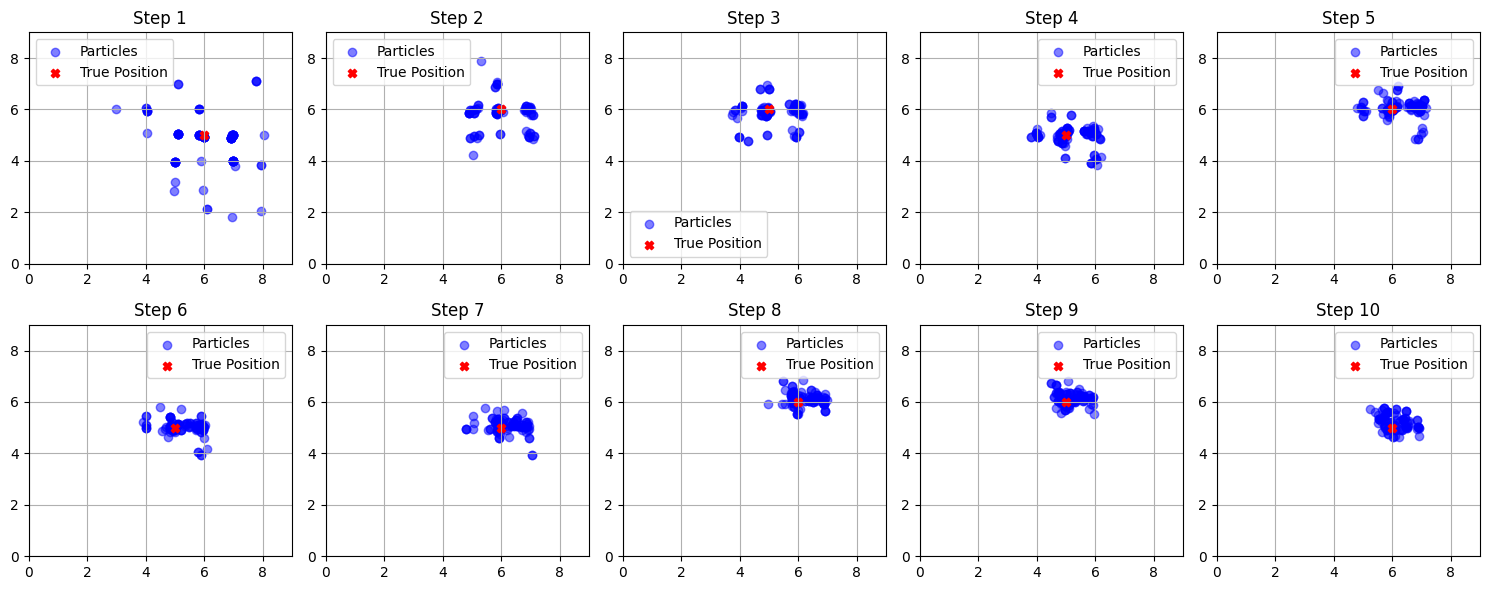

In [8]:
true_position = [5, 5] # start position of 'robot'
particles = []
movements = [(1, 0), (0, 1), (-1, 0), (0, -1), (1, 1), (-1, -1), (1, 0), (0, 1), (-1, 0), (1, -1)]
monte_carlo_localization(true_position, movements)

# TESTING

### 1

"edge" case #1 is a very fast moving agent that is just bouncing between opposite corners of the environment.

You can see the particles are taking longer and having trouble converging due to the drastic nature of the changes; however, they still do a good job roughly because they know with some certainty what the robot is doing

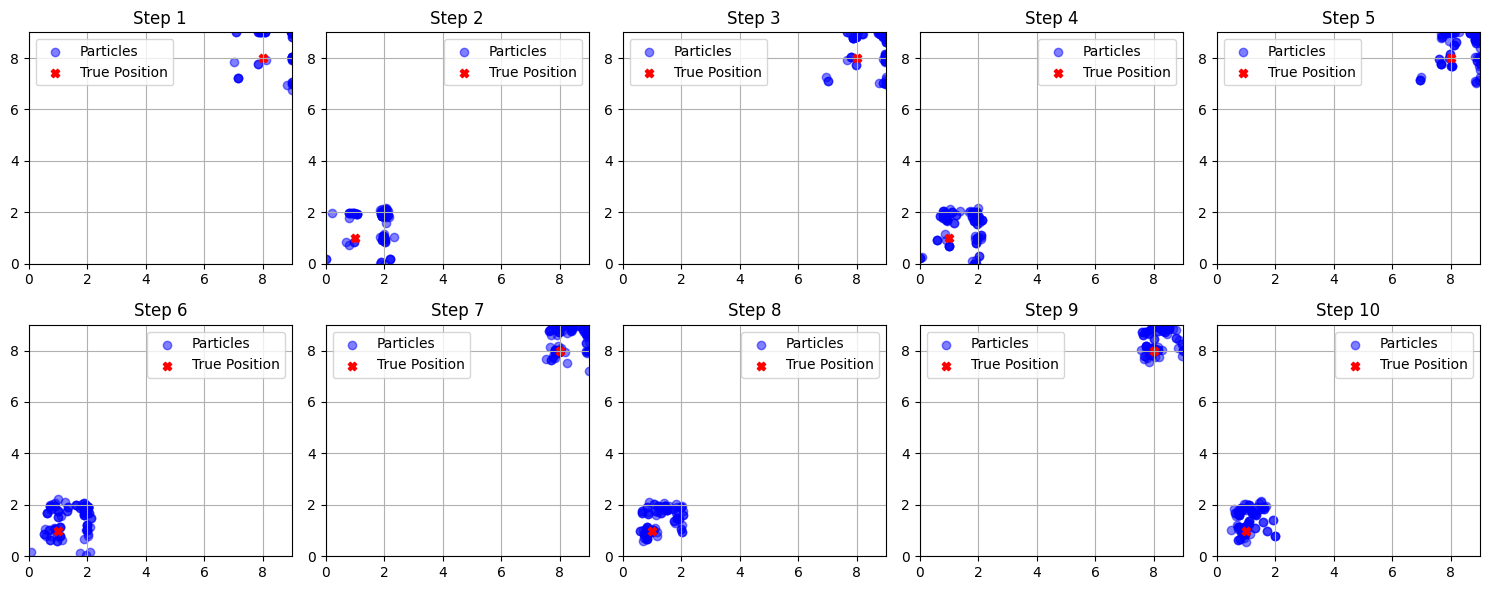

In [10]:
true_position = [1, 1] # start position of 'robot'
particles = []
movements = [(7, 7), (-7, -7), (7, 7), (-7, -7), (7, 7), (-7, -7), (7, 7), (-7, -7), (7, 7), (-7, -7)]
monte_carlo_localization(true_position, movements)

### 2

"edge" case 2 is similar but this time the particle follows a square path, stopping occasionally

similar to before, the particles track the agent/robots position pretty well because the particle updates get information about the robots positional differences

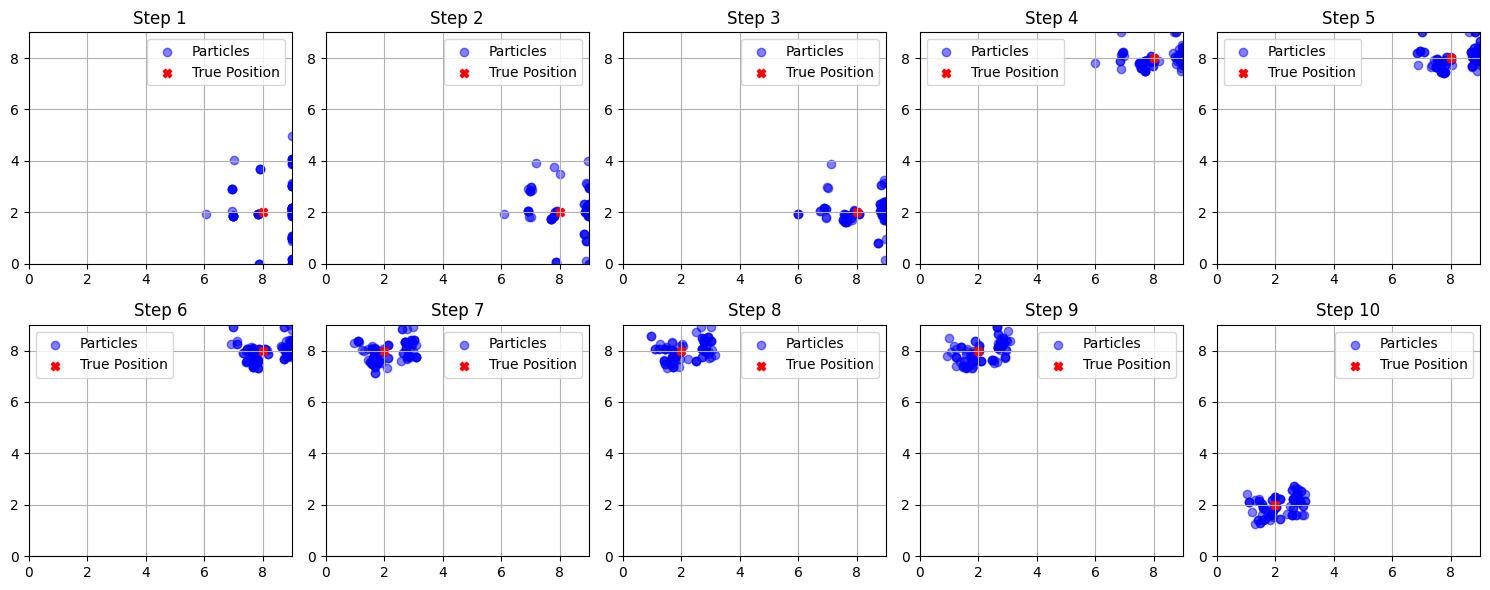

In [ ]:
true_position = [2, 2] # start position of 'robot'
particles = []
movements = [(6, 0), (0, 0), (0, 0), (0, 6), (0,0), (0, 0), (-6, 0), (0,0), (0, 0), (0, -6)]
monte_carlo_localization(true_position, movements)

### 3

Stationary particle, normal case

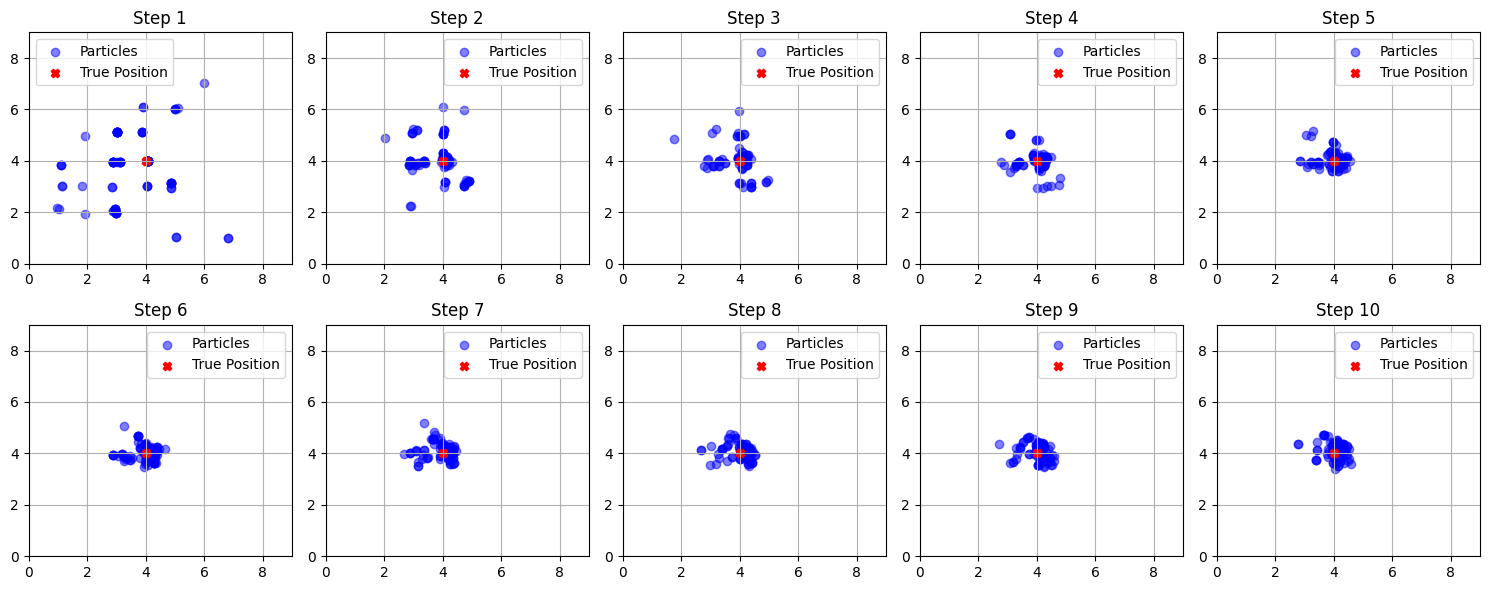

In [14]:
true_position = [4, 4] # start position of 'robot'
particles = []
movements = [(0, 0) for _ in range(10)]
monte_carlo_localization(true_position, movements)

### 4

complete random movement, normal case

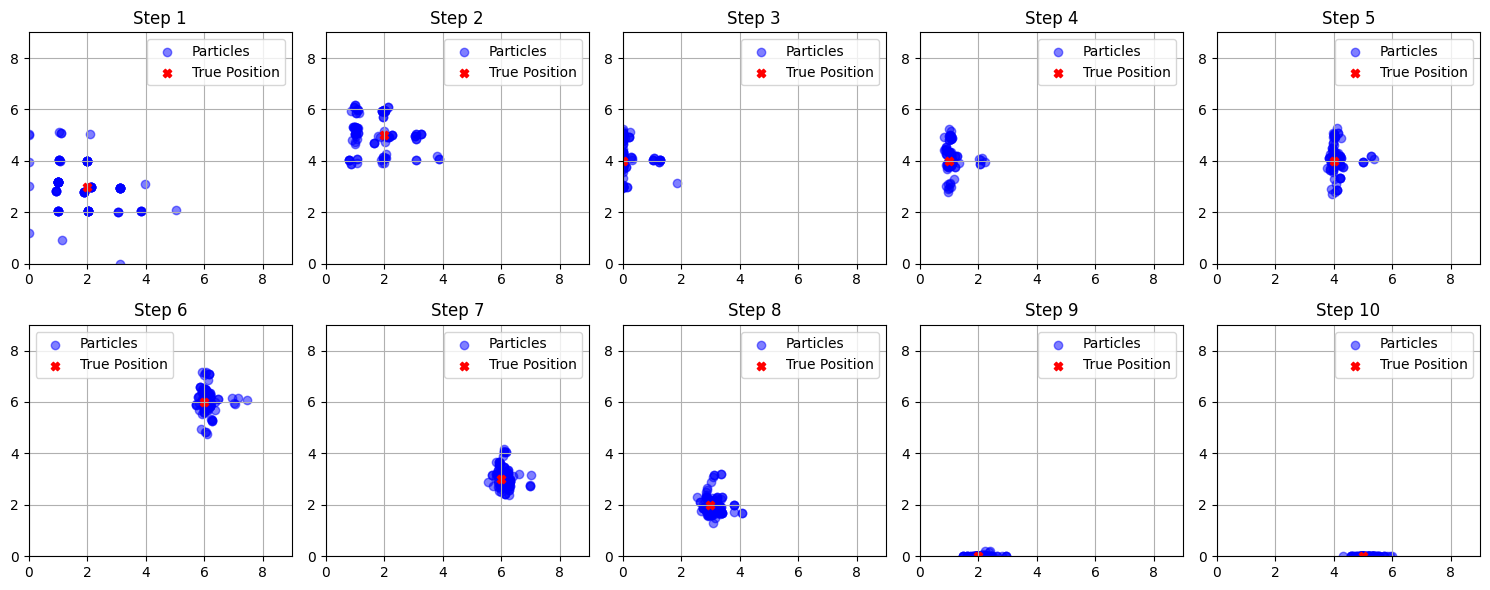

In [19]:
true_position = [4, 4]  # start position of 'robot'
particles = []
movements = [(random.randint(-3, 3), random.randint(-3, 3)) for _ in range(10)]
monte_carlo_localization(true_position, movements)

### 5 

curved path, normal case

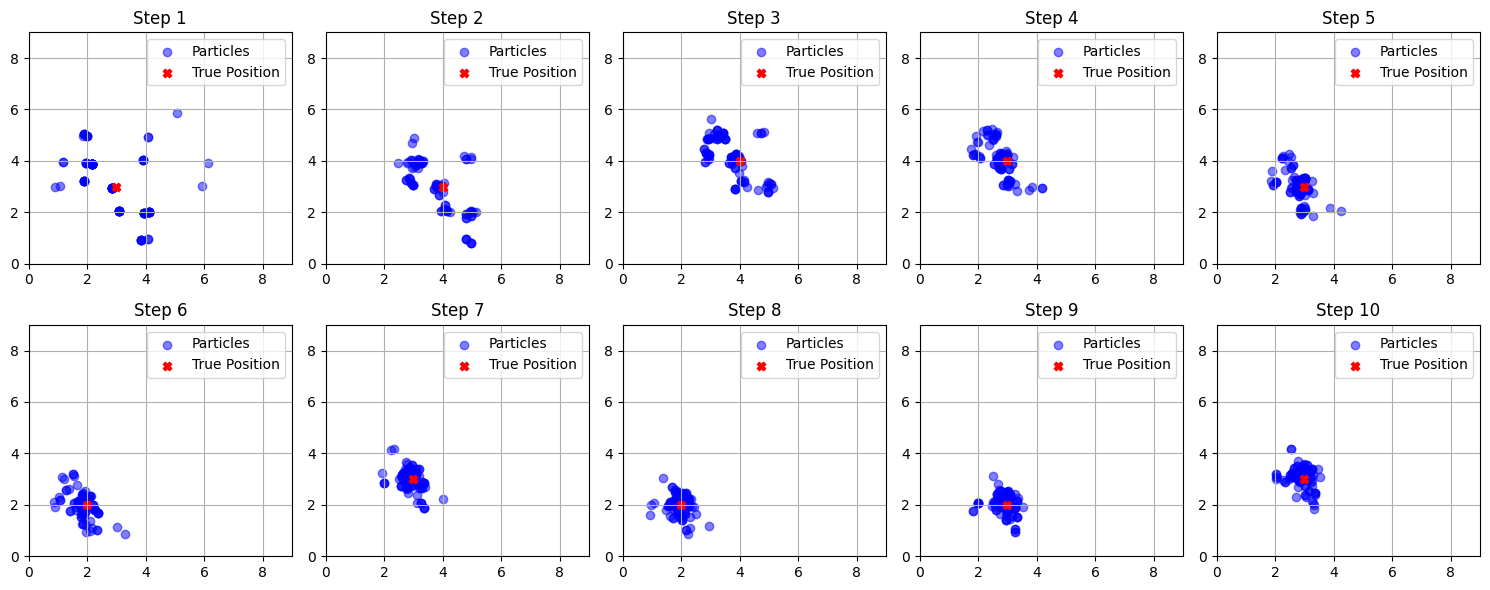

In [20]:
true_position = [2, 2]  # start position of 'robot'
particles = []
movements = [(1, 1), (1, 0), (0, 1), (-1, 0), (0, -1), (-1, -1), (1, 1), (-1, -1), (1, 0), (0, 1)]
monte_carlo_localization(true_position, movements)

### 6

'ping pong', normal case

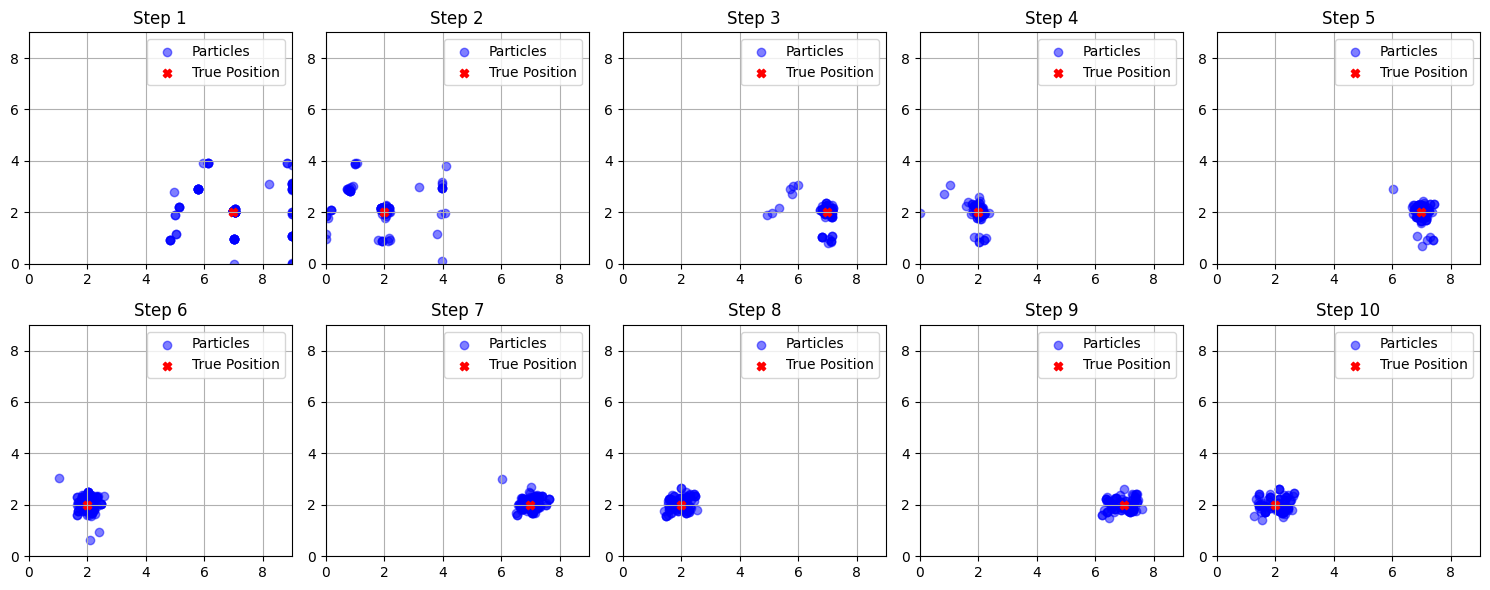

In [22]:
true_position = [2, 2]  # start position of 'robot'
particles = []
movements = [(5, 0), (-5, 0)] * 5
monte_carlo_localization(true_position, movements)

### 7 

boundary testing, normal/edge case

you can see that because the particle is trying to move down and to the left, the particles think that motion is occuring and as a result move off the screen, even if the robot is not actually moving due to some constraint placed on it. This could be a real world scenario where the robot thinks it's moving but isn't, and as a result the particle approximation is messed up.

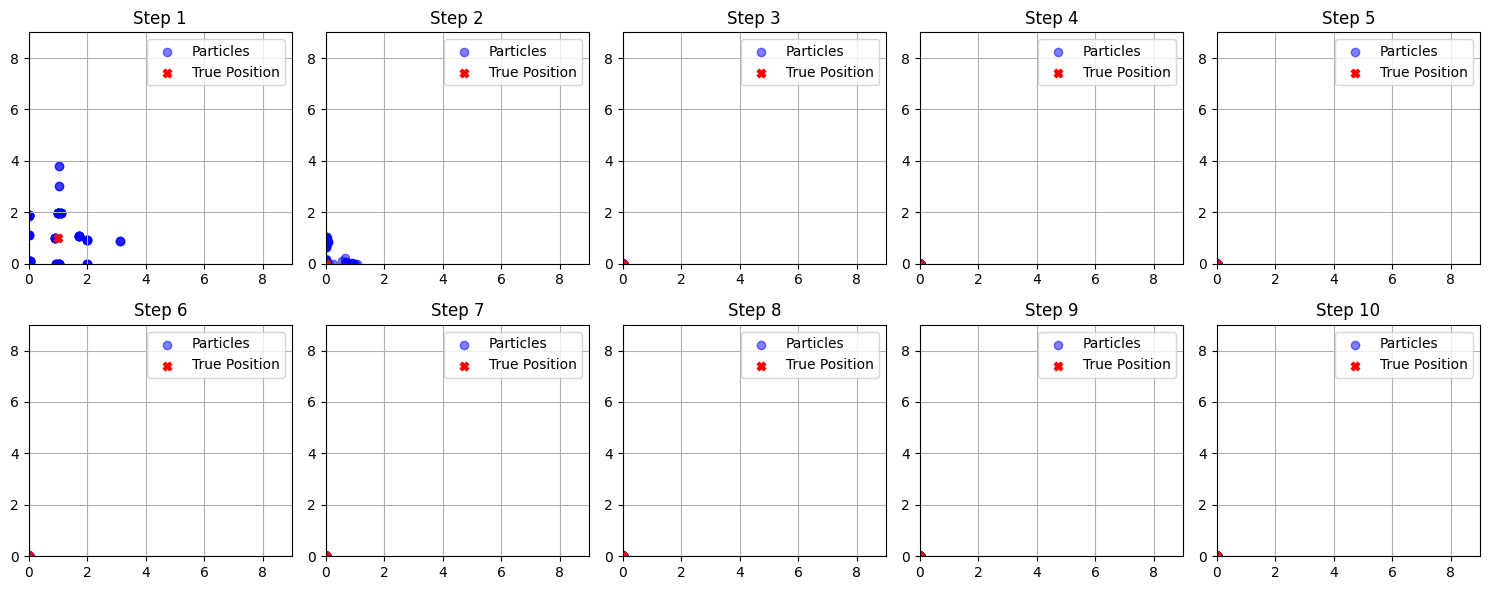

In [24]:
true_position = [2, 2]  # start position of 'robot'
particles = []
movements = [(-1, -1) for _ in range(10)]
monte_carlo_localization(true_position, movements)

### 8

tiny / slow movements, normal case, MCL has no problem tracking

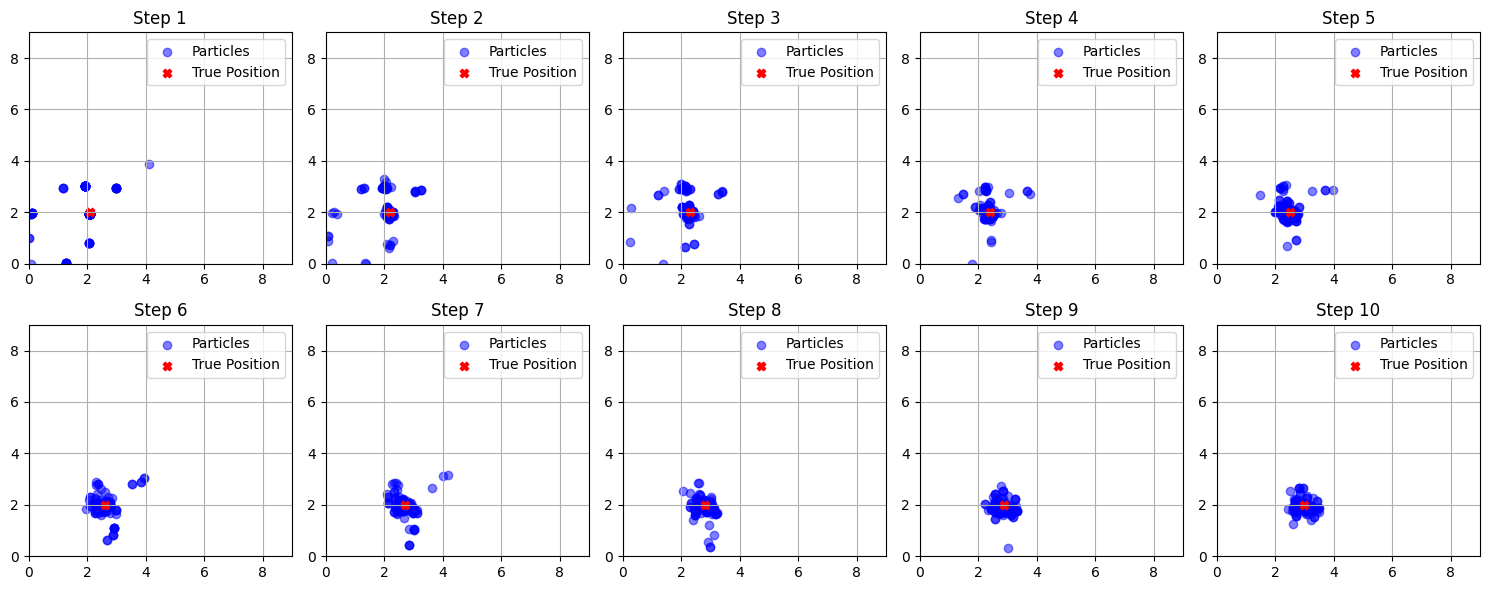

In [27]:
true_position = [2, 2]  # start position of 'robot'
particles = []
movements = [(.1, 0) for _ in range(10)]
monte_carlo_localization(true_position, movements)